# Time Series Forescasting with RNN

## Author:HSO

## Recurrent Neural Networks

<img src="images/bi_rnn.png" width=400 height=200/>

## Deep Recurrent Neural Networks

The power of deep leanring comes with the stacking of multiple computational layers on top of each other. Similar from MLP, we can make deep RNN by stacking multiple RNN on top of each other. In deep RNN, the input sequance of a reccurent layer is the output sequance of the previous recurrent layer. The final prediction is then taken from the last timestep of the final RNN layer. 

The internal state of each computational unit of a RNN is $s_0$ and pertudes the memory pf the series. The number of hodden neurons on each timstep correspomds to the dimension of the internal state, denoted as $f$. The internal state of each timestep carries the memory of the own series. For the first timestep, the input correspoding to $y=h(V_S_{t-1})$ is init to zero. The function $h(\dot)$ correeponds to a non-linear transformation commonly the $tanh$. The output of last timestep corresponds to a function of the last internal state $U$, where $W$ is a nonlinear transformation. The RNN can also be made to return output every timestep and this is used commonly employed in language translations models that require the translated text to be a series of words in the target language.  A key reminder is that the weights $V$, $x_i$ and $x_i$ are shared across the timesteps of the RNN  to keep the number of trainable weights reduced. In the case of language models. the input $m$ could be a one-hot encoded representation of the words. For time series modeling of one variable, $x_i$ corresponds to a single number. However the objective of this work is to explore RNN with multivariate time series, and RNN are parocular useful to address cross-correlations between individual sequances. In this case a RNN model $m$ as input $x_i$ that corresponds to a $m$ dimensional vector. 

<img src="images/rnn.png" width=400 height=200/>


 ## Bidirectional RNN
 
 Bidirectional RNN can be easily created as well, by stacking multiople bi-directional RNNs to of each other. Such deep RNN are commonly used for compex tasks such as language translation such as BERT (transfomed using CNN with embeddings) or text generation to describe as context of a images (image captioning) using sequance to sequence models. 

RNN that wotk along unidirectional along a single direction have some limitations. In many cases capturing the sequential  information and memory in the reversed series improves predictions. An RNN that used both forwards and backward tranversal corresponds to a bi-directional RNN, improving the ability  of the network to capture memory over long ranges.
  

<img src="images/bi.png" width=400 height=200/>




## Training Recurrent Neural Networks

RNN are connotated with the difficult to be trained. Vanilla RNN, the most common, suffer from the problem of vanishing and exploding gradients that lead to erratic results during training. As such, the RNN has some diffculties learning long-range dependencies. In the case of time series forescasting, going too many steps back in the past would be problematic. To address this problem, Long Short Term Memory (LSTM) and Gate Recurrent Unit (GRU), com into action.

For the purpose of the study, we gonna detail how RNNs are trained using the BackProgapagion Throught Time (BPTT), that is a variant of the backpropagation algorithm. Also we gonna detail how vanishing and exploding gradients arise during BPTT.

Considering the computational graph of the RNN, the gradient computation is represented as 


<img src="images/rnn_graph.png" width=400 height=200/>

Considering the weights $U$, there is one path to compute the partial derivative as

$$
\frac{\partial L}{\partial V} = \frac{\partial L}{ \partial \hat{x}_t} \frac{\partial\hat{x}_t}{\partial V}
$$

Howerver, due to the sequanciality struture of RNN, there are many possible paths connecting the weights and the loss. hende, the partial derivatives correspond to the sum of partial derivatives along the indiviudual paths that starts at the loss node and ends at every timestep node in the computational graph. 

$$
\frac{\partial L}{\partial W} = \left( \frac{\partial L}{\partial \hat{x}_t}  \frac{\partial \hat{x}_t}{ \partial s_p} \frac{\partial s_p}{\partial W}\right) +
\left( \frac{\partial L}{\partial \hat{x}_t}  \frac{\partial \hat{x}_t}{ \partial s_p} \frac{\partial s_p}{\partial s_{p-1}} \frac{\partial s_{p-1}}{\partial W}\right) + \cdots +  \left( \frac{\partial L}{\partial \hat{x}_t}  \frac{\partial \hat{x}_t}{ \partial s_p} \frac{\partial s_p}{\partial s_{p-1}} \cdots \frac{\partial s_2}{\partial s_1} \frac{\partial s_1}{\partial W} \right)
$$


$$
\frac{\partial L}{\partial U} = \left( \frac{\partial L}{\partial \hat{x}_t}  \frac{\partial \hat{x}_t}{ \partial s_p} \frac{\partial s_p}{\partial U}\right) +
\left( \frac{\partial L}{\partial \hat{x}_t}  \frac{\partial \hat{x}_t}{ \partial s_p} \frac{\partial s_p}{\partial s_{p-1}} \frac{\partial s_{p-1}}{\partial U}\right) + \cdots +  \left( \frac{\partial L}{\partial \hat{x}_t}  \frac{\partial \hat{x}_t}{ \partial s_p} \frac{\partial s_p}{\partial s_{p-1}} \cdots \frac{\partial s_2}{\partial s_1} \frac{\partial s_1}{\partial U} \right)
$$


The backpropagation thorught times is the technique used to comoute the weights by summing over the pahts conencting the loss node and every timestep.
The problem of vanishing gradient in long-range RNN is due to the multiplicative terms in the BPTT gradient. 

As example. computing the gradient along the computation path connecting the loss node and $i^{th}$ timestep is $\left( \frac{\partial L}{\partial \hat{x}_t}  \frac{\partial \hat{x}_t}{ \partial s_p} \frac{\partial s_p}{\partial s_{p-1}} \cdots \frac{\partial s_{i+1}}{\partial s_i} \frac{\partial s_i}{\partial s_{i-1}} \cdots \frac{\partial s_i}{\partial W} \right) $. Is obvious that this chain of gradietn multiplications is very long to model long-range dependencies and is from here where the porblem of vanishing gradient arises. The activation of the internal state can be either a $tanh$ or $sigmoid$. For the first the derivative of $tanh$ is $\frac{\left(1)}{1 + e^{-x}} \right)^2 e^{-x}$, which is bound in the interval $[0, 0.25]$. For the sigmoid version, the first-prder derivatives is $\left( \frac{\partial s_i}{\partial s_{i-1}} \right)$ bonded in $s_i$. Hence, the gradients $W$ are positive. For long-range timesteps, multiplying these fractional gradients dimishes the final product to zero and from there there is no gradient flow from a long-range timestep. Due to the almost zero values of the gradients, the weights do not update and hence the neurons are said to be saturated. 

It is notworskthy that $U, \frac{\partial s_i}{ \partial s_{i-1}}$ and $\frac{\partial s_i}{\partial W} are matrices and therefore the partial derivatives $t$ and $s_t$ are computed on matrices. The final output is then computed through matric multiplications and additions,and the first order derivative (jacobian).  If any of the Jacobian matrix is as fractions, then for a long-range RNN we would observe the vanish gradient phenomena. Contrary, if the element of the Jacobian is greater than one, we would see the exploding gradients phenomena furins training. 


## Addressing the long-range dependency problematic

To address the problematic that vanilla RNN has on leanring long-range dependencies due to vanishing and exploding gradient, Long Short Term Memory  proposed by Sepp Hochreiter and Jurgen Schmidhuber was proposed in 1997. Later the Gated Recurrent Unit was introduced and corresponds to a simplyfied version of LSTM.



## Long Short Term Memory

In order to solve the vanishing gradient, LSTM introduces an additional computations on each timestep. We can see it as a black box unit that, for timestep $h_t$, returns teh state internal $(f_t)$ and this is forwarded to the next timestep. But internaly, these vectos are computed differently. LTSM introduces three new gates: The input $(o_t$), forget $g_t$ and output $c_t$ gates. On each timestep exist a hidden state $h_t$ and a internal memory $\sigma W^h x_t + U^t s_{t-1}$ and are computed as

$$
f_t = \sigma (W^f x_t + U^f s_{t-1})
$$

$$
o = \sigma (W^o x_t + U^o s_{t-1})
$$

$$
g_t = \tanh (W^g x_t + U^g s_{t-1})
$$

$$
c_t = f_t 	\odot  c_{t-1} + h_t  	\odot g_t
$$

$$
s_t = \tanh (c_t) 	\odot o_t
$$

$$
h_t = f_t
$$







Lets analise step by step

<img src="images/LSTM3-SimpleRNN.png" width=400 height=200 title= Simple LSTM/>


A chain of several LSTM blocks

<img src="images/LSTM3-chain.png" width=400 height=200 title= Simple LSTM/>

With the notation

<img src="images/LSTM2-notation.png" width=400 height=100 title= Simple LSTM/>


## The Core Idea Behind LSTMs

The key to LSTMs is the cell state, the horizontal line running through the top of the diagram.

The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

<img src="images/LSTM3-C-line.png" width=400 height=100 title= Simple LSTM/>

The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.

<img src="images/LSTM3-gate.png" width=50 height=200 title= Simple LSTM/>




## Step-by-Step LSTM Walk Through

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at $h_{t−1} and $x_t$, and outputs a number between 0 and 1 for each number in the cell state $C_{t−1}. A 1 represents “completely keep this” while a 0 represents “completely get rid of this.”

Let’s go back to our example of a language model trying to predict the next word based on all the previous ones. In such a problem, the cell state might include the gender of the present subject, so that the correct pronouns can be used. When we see a new subject, we want to forget the gender of the old subject.

<img src="images/LSTM3-focus-f.png" width=400 height=200 title= Simple LSTM/>


The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, C̃ t, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

In the example of our language model, we’d want to add the gender of the new subject to the cell state, to replace the old one we’re forgetting.

<img src="images/LSTM3-focus-i.png" width=400 height=200 title= Simple LSTM/>

It’s now time to update the old cell state, $C_{t−1}$, into the new cell state Ct. The previous steps already decided what to do, we just need to actually do it.

We multiply the old state by ft, forgetting the things we decided to forget earlier. Then we add it $\hat{C}_t$. This is the new candidate values, scaled by how much we decided to update each state value.

In the case of the language model, this is where we’d actually drop the information about the old subject’s gender and add the new information, as we decided in the previous steps.

<img src="images/LSTM3-focus-C.png" width=400 height=200 title= Simple LSTM/>

Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between $[-1, 1]$  and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

For the language model example, since it just saw a subject, it might want to output information relevant to a verb, in case that’s what is coming next. For example, it might output whether the subject is singular or plural, so that we know what form a verb should be conjugated into if that’s what follows next.

<img src="images/LSTM3-focus-o.png" width=400 height=200 title= Simple LSTM/>


Information from link: https://colah.github.io/posts/2015-08-Understanding-LSTMs/


A brief undestanding oin the computations, the gates $o_t$, $\sigma(\dot)$ and $[0,1]$ are generated trhought sigmoid activations, and $h_t$ limits their limits withwin $f_t$. hende, these act as gates by letting out only a fraction of the value when multiplied with another variable. The input gate $o_t$ controls the portion of the new computation to be kept. The forget gate $c_t$ controls the effect that the previous timestep, and the output gate $f_t$ controls how much of the internal state is passed to the output. The internal hidden state is compuyted frm the input of the current timesetp and output of the previous timestep. Finally, the $z_t$ would be passed to the next timestep and computed from the current internal memory and the output gate $r_t$. These items are used to selectively include the previous memory and the current hidden state that is computed.  The gating mechanims of LSTM enables memory transfer between long-range timesteps.



## Lets now play with the same examples uisng LSTM



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U seaborn==0.9.0

     |████████████████████████████████| 215kB 5.6MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [ ]:
BASE_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/'

PLOTS_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/plots/'
DUMPS_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/dumps/'
DATA_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/data/'
CHECK_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/checkpoints/'

IMAGES_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/images/'


In [ ]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read the dataset into a pandas df
df = pd.read_csv(DATA_PATH + 'PRSA_data_2010.1.1-2014.12.31.csv')

print('Shape of the dataframe:', df.shape)

# Show some details
df.head(5)


Shape of the dataframe: (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)


In [ ]:
# Create a datetime from the related year, monthm day, etc related columns. 
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], 
                                                                                          month=row['month'], 
                                                                                          day=row['day'],
                                                                                          hour=row['hour']), axis=1)

# Sort valeus by date in ascedng order
df.sort_values('datetime', ascending=True, inplace=True)

# Quick view
df.head(5)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


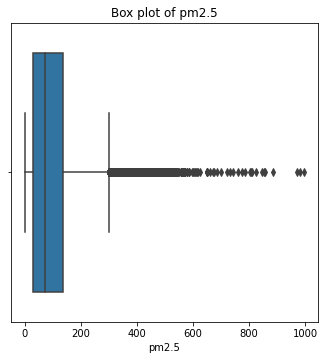

In [ ]:
# Lets plot the Pressure column with box oplot to see the central tendency and llok for outliers
plt.figure(figsize= (5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')

plt.savefig(PLOTS_PATH + 'lstm_box_plot' + '.png')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


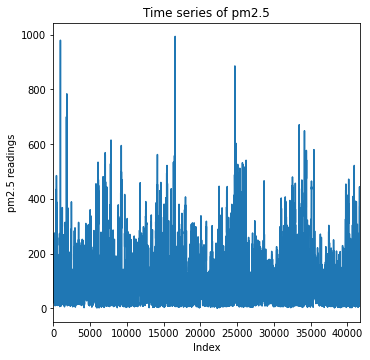

In [ ]:
# plot tyhe readings
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

plt.savefig(PLOTS_PATH + 'lstm_Time series of pm2.5' + '.png')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


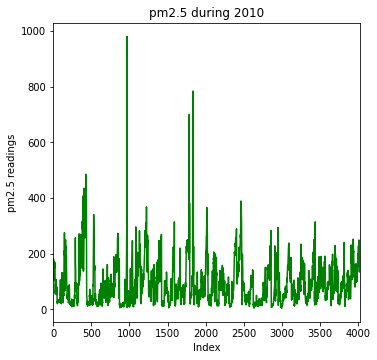

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


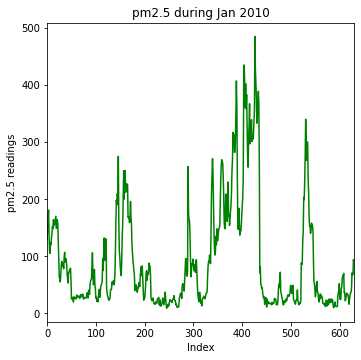

In [ ]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

plt.savefig(PLOTS_PATH + 'lstm_pm2.5 during 2010' + '.png')
plt.show()



#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

plt.savefig(PLOTS_PATH + 'lstm_pm2.5 during Jan 2010' + '.png')
plt.show()


In [ ]:
# Lets normalize things

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))


In [ ]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)


Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [ ]:
#First five rows of train
print(df_train.head())

#First five rows of train
print(df_val.head())

   No  year  month  day  hour  ...   Iws  Is  Ir            datetime scaled_pm2.5
0  25  2010      1    2     0  ...  1.79   0   0 2010-01-02 00:00:00     0.129779
1  26  2010      1    2     1  ...  2.68   0   0 2010-01-02 01:00:00     0.148893
2  27  2010      1    2     2  ...  3.57   0   0 2010-01-02 02:00:00     0.159960
3  28  2010      1    2     3  ...  5.36   1   0 2010-01-02 03:00:00     0.182093
4  29  2010      1    2     4  ...  6.25   2   0 2010-01-02 04:00:00     0.138833

[5 rows x 15 columns]
          No  year  month  day  ...  Is  Ir            datetime  scaled_pm2.5
33096  35065  2014      1    1  ...   0   0 2014-01-01 00:00:00      0.024145
33097  35066  2014      1    1  ...   0   0 2014-01-01 01:00:00      0.053320
33098  35067  2014      1    1  ...   0   0 2014-01-01 02:00:00      0.065392
33099  35068  2014      1    1  ...   0   0 2014-01-01 03:00:00      0.070423
33100  35069  2014      1    1  ...   0   0 2014-01-01 04:00:00      0.079477

[5 rows x 15 col

In [ ]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


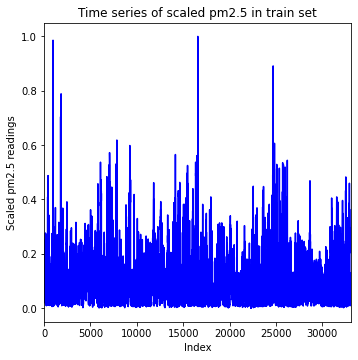

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


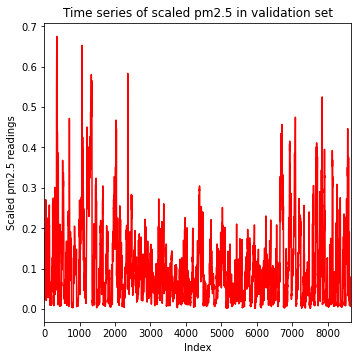

In [ ]:
"""
The train and validation time series of scaled_pm2.5 plots.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.savefig(PLOTS_PATH + 'lstm_Time series of scaled pm2.5 in train set' + '.png')
plt.show()



plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.savefig(PLOTS_PATH + 'lstm_Time series of scaled pm2.5 in validation set' + '.png')
plt.show()


In [ ]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y
    

In [ ]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)


Shape of train arrays: (33089, 7) (33089,)


In [ ]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)


Shape of validation arrays: (8654, 7) (8654,)


In [ ]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)


Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [ ]:
# Lets define our LSTM  model

from keras.layers.recurrent import LSTM
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import  Input, Dropout, Dense


In [ ]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')


The LSTM layers are defined for seven timesteps. In this example, two LSTM layers are stacked. The first LSTM returns the output from each all seven timesteps. This output is a sequence and is fed to the second LSTM which returns output only from the last step. The first LSTM has sixty four hidden neurons in each timestep. Hence the sequence returned by the first LSTM has sixty four features.


In [ ]:
lstm_layer1 = LSTM(64, input_shape=(7,1), return_sequences=True)(input_layer)
lstm_layer2 = LSTM(32, input_shape=(7,64), return_sequences=False)(lstm_layer1)


In [ ]:
dropout_layer = Dropout(0.2)(lstm_layer2)

In [ ]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)


he input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making predictions. The box plot of pm2.5 shows the presence of outliers. Hence, mean absolute error (MAE) is used as absolute deviations suffer less fluctuations compared to squared deviations.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.


In [ ]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 7, 64)             16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch, at which the loss function has been minimum.


In [ ]:

save_weights_at = os.path.join(CHECK_PATH , 'PRSA_data_PM2.5_LSTM_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
history = ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)


Epoch 1/20
2069/2069 [==============================] - 22s 9ms/step - loss: 0.0259 - val_loss: 0.0136
Epoch 2/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0155 - val_loss: 0.0127
Epoch 3/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0150 - val_loss: 0.0116
Epoch 4/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0152 - val_loss: 0.0117
Epoch 5/20
2069/2069 [==============================] - 17s 8ms/step - loss: 0.0149 - val_loss: 0.0143
Epoch 6/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0147 - val_loss: 0.0119
Epoch 7/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0148 - val_loss: 0.0119
Epoch 8/20
2069/2069 [==============================] - 19s 9ms/step - loss: 0.0149 - val_loss: 0.0117
Epoch 9/20
2069/2069 [==============================] - 19s 9ms/step - loss: 0.0148 - val_loss: 0.0120
Epoch 10/20
2069/2069 [==============================] - 18s 9ms/step - l

dict_keys(['loss', 'val_loss'])


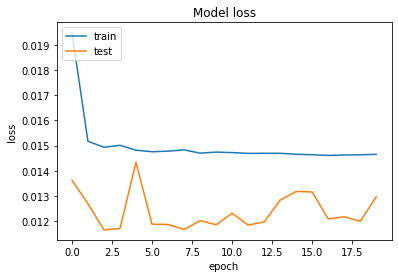

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.savefig(PLOTS_PATH + 'lstm_Model loss' + '.png')
plt.show()


In [ ]:
best_model = load_model(os.path.join(CHECK_PATH , 'PRSA_data_PM2.5_LSTM_weights.03-0.0116.hdf5'))
preds = best_model.predict(X_val)

pred_pm25 = scaler.inverse_transform(preds) #Perform inverse scale in the preicted targets
pred_pm25 = np.squeeze(pred_pm25)


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))


MAE for the validation set: 11.5751


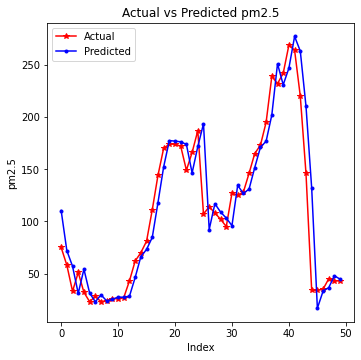

In [ ]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')

plt.savefig(PLOTS_PATH + 'lstm_Actual vs Predicted pm2.5' + '.png')
plt.show()


## Gated Recurrent Units

GRU are derived from LSTM and are a simplier form that only has two inyternal states, namely, the update gate $z_t$ and the reset gate $r_t$. the computations of the update and reset gates are

$$
z_t = \sigma (W^z x_t + U^z s_{t-1})
$$

$$
r_t = \sigma (W^z x_t + U^z s_{t-1})
$$

The state of $s_t$ of the timestep $t$ is computed using the input $x_t$ state $s_{t-1}$ from previous timestep, the update, and the reset gates. as

$$
s_t = z_t \odot s_{t-1} + (1 - z_t) \odot \tanh \left( (W^h x_t + U^h (r_t \odot s_{t-1})) \right)
$$

The update obtained by the sigmoid dunction determines how much of the previous steps memory is to be retained in the current timestep. The reset gate controls how to combine the previous memory with the current steps input.


## Differences between LSTM anf GRU

GRU has fewer parameters /trainable weights when compared with LSTM. One rule is to use GRU when we have less training data since it requires less trainable weights. Contrary LSTM shows better performance when we have large datasets such as model languages.


## Lets Play with GRU

All initial steps on the past are the same and are kept in memory


In [ ]:
from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


In [ ]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')


The GRU layers are defined for seven timesteps. In this example, two GRU layers are stacked. The first GRU returns the output from each all seven timesteps. This output is a sequence and is fed to the second GRU which returns output only from the last step. The first GRU has sixty four hidden neurons in each timestep. Hence the sequence returned by the first GRU has sixty four features.


In [ ]:
gru_layer1 = GRU(64, input_shape=(7,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(7,64), return_sequences=False)(gru_layer1)


In [ ]:
dropout_layer = Dropout(0.2)(gru_layer2)


In [ ]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)


The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making predictions. The box plot of pm2.5 shows the presence of outliers. Hence, mean absolute error (MAE) is used as absolute deviations suffer less fluctuations compared to squared deviations.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.


In [ ]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
gru (GRU)                    (None, 7, 64)             12864     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 22,305
Trainable params: 22,305
Non-trainable params: 0
_________________________________________________________________


The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch, at which the loss function has been minimum.


In [ ]:

save_weights_at = os.path.join(CHECK_PATH , 'PRSA_data_PM2.5_GRU_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
history = ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)
             

Epoch 1/20
2069/2069 [==============================] - 23s 10ms/step - loss: 0.0205 - val_loss: 0.0127
Epoch 2/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0156 - val_loss: 0.0120
Epoch 3/20
2069/2069 [==============================] - 20s 9ms/step - loss: 0.0152 - val_loss: 0.0127
Epoch 4/20
2069/2069 [==============================] - 20s 10ms/step - loss: 0.0150 - val_loss: 0.0143
Epoch 5/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0152 - val_loss: 0.0116
Epoch 6/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0148 - val_loss: 0.0125
Epoch 7/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0151 - val_loss: 0.0135
Epoch 8/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0150 - val_loss: 0.0128
Epoch 9/20
2069/2069 [==============================] - 18s 9ms/step - loss: 0.0148 - val_loss: 0.0128
Epoch 10/20
2069/2069 [==============================] - 18s 9ms/step -

dict_keys(['loss', 'val_loss'])


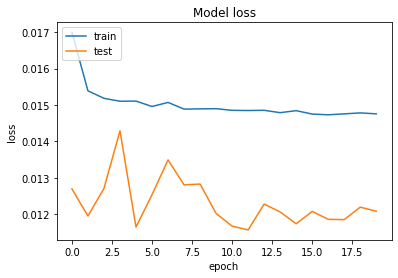

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.savefig(PLOTS_PATH + 'gru_Model loss' + '.png')
plt.show()


In [ ]:
best_model = load_model(os.path.join(CHECK_PATH , 'PRSA_data_PM2.5_GRU_weights.12-0.0116.hdf5'))
preds = best_model.predict(X_val)

pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))


MAE for the validation set: 11.5001


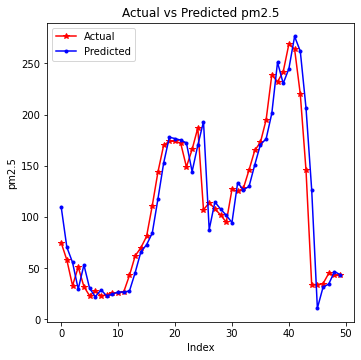

In [ ]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')


plt.savefig(PLOTS_PATH + 'gru_Actual vs Predicted pm2.5' + '.png')
plt.show()
